In [3]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
folder = "/Users/mallu899/Mirror/projects/PaperIV_code/gitRepo/DotDetectionKinetics/V52A_data/"

In [143]:
def normalizeTimesAddStrain( OSym="even", run=4):
    df_even = pd.read_excel(folder+'dots_run{}_even.xlsx'.format(run), engine='openpyxl')
    df_odd = pd.read_excel(folder+'dots_run{}_odd.xlsx'.format(run), engine='openpyxl')
    print(len(df_even), len(df_odd))
    time1 = np.round(df_odd.iloc[0]["time"]/1000)
    #print(time1, np.round(df_odd["time"]/1000))
    norm_time_odd = np.round(df_odd["time"]/1000)-time1 
    norm_time_even = np.round(df_even["time"]/1000)-time1
    df_odd["Time (s)"] = norm_time_odd
    df_even["Time (s)"]  = norm_time_even
    if OSym=="even":
        df_even["Strain"] = ["OSymL" for x in range(len(df_even))]
        df_odd["Strain"] = ["term" for x in range(len(df_odd))]
    else:
        df_even["Strain"] = ["term" for x in range(len(df_even))]
        df_odd["Strain"] = ["OSymL"  for x in range(len(df_odd))]
    
    df = pd.concat([df_odd, df_even])
    df["Run"] = [run for x in range(len(df_odd)+len(df_even))]
    
    return(df)

In [144]:
trun = normalizeTimesAddStrain(OSym="even")


10218 10287


In [145]:
trun

,coord_1,coord_2,internalCoord_1,internalCoord_2,err_1,err_2,err_3,ampl,bg,id,dr,sigma,time,numCells,Position,Time (s),Strain,Run
0,720.672579,168.128945,0.736588,-0.629709,0.139325,0.056049,-0.036958,347.136298,116.784093,86,0.127375,1.189853,1691666203222,564,1,0.0,term,4
1,657.243805,186.438229,0.365075,-0.445943,0.046189,0.047741,-0.000440,4370.992556,121.008308,78,0.881587,3.632909,1691666203222,564,1,0.0,term,4
2,1031.995091,217.056822,0.331278,0.175325,0.052402,0.067487,-0.002703,5418.687926,117.173105,107,1.540164,4.016410,1691666203222,564,1,0.0,term,4
3,1096.492813,250.924543,0.261757,-0.445164,0.029124,0.040565,0.005622,217.306731,121.156518,111,0.276562,0.743866,1691666203222,564,1,0.0,term,4
4,1028.424433,284.729283,0.814073,-0.058646,0.082468,0.095479,-0.012566,375.637286,129.972354,106,0.252021,1.259168,1691666203222,564,1,0.0,term,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,636.586474,1488.549580,0.829652,-0.381412,0.011685,0.013874,-0.000176,4506.588802,126.405409,246,0.115055,2.733384,1691666491883,589,20,289.0,OSymL,4
10214,1052.305022,1484.974743,0.767040,-0.087319,0.035056,0.053973,0.005324,4215.995112,107.690778,560,1.673075,3.449512,1691666491883,589,20,289.0,OSymL,4
10215,518.707262,1490.913921,0.698964,-0.577758,0.012912,0.012054,-0.000677,5520.616611,125.428784,175,0.281070,2.970687,1691666491883,589,20,289.0,OSymL,4
10216,730.547384,1488.128888,0.710911,-0.237591,0.067203,0.099906,-0.013508,1817.255005,114.259059,306,1.628169,2.847248,1691666491883,589,20,289.0,OSymL,4


In [146]:
def AvgNumDotsCells(df): 
    run=trun
    avgNumDotsCells_term = np.array(run[run["Strain"]=="term"].groupby("Position").count()["numCells"])/ \
    np.array(run[run["Strain"]=="term"].groupby("Position").mean(numeric_only=True)["numCells"])
    avgNumDotsCells_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").count()["numCells"])/ \
    np.array(run[run["Strain"]=="OSymL"].groupby("Position").mean(numeric_only=True)["numCells"])
    time_term = np.array(run[run["Strain"]=="term"].groupby("Position").first()["Time (s)"])
    time_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").first()["Time (s)"])
    strain_term = np.array(run[run["Strain"]=="term"].groupby("Position").first()["Strain"])
    strain_OSym = np.array(run[run["Strain"]=="OSymL"].groupby("Position").first()["Strain"])
    runs = np.array(run.groupby(["Position", "Strain"]).first()["Run"])
    avgNumDotsCells = pd.DataFrame({"Run":runs, "Strain":np.concatenate([strain_term, strain_OSym]), "Avg. Num. (Dots)": \
             np.concatenate([avgNumDotsCells_term, avgNumDotsCells_OSym]), "Time (s)": \
              np.concatenate([time_term, time_OSym])})
    return(avgNumDotsCells)

In [147]:
trun_Num = AvgNumDotsCells(trun)

<Axes: xlabel='Time (s)', ylabel='Avg. Num. (Dots)'>

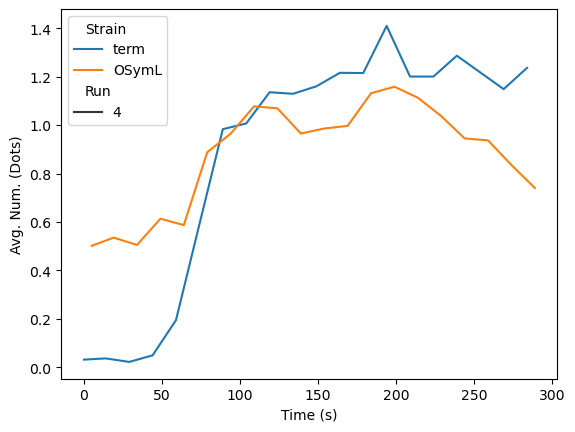

In [148]:
sns.lineplot(trun_Num, x = "Time (s)", y = "Avg. Num. (Dots)", hue = "Strain", style = "Run")

In [3]:
def dfRuns(file, OSym="even",  run=1, protein="wt", IPTG="1 mM", ONPG="10 mM"):
    dots = pd.read_csv(file, header = None, names = ["avg. N(Dots)/Cell", "SEM","Time (ms)"])
    positions = len(dots)
    
    if OSym=="even":
        strains = np.where( dots.index.isin(np.arange(0,40,2)) , "term", "OSymL")
    if OSym=="odd":
        strains = np.where( dots.index.isin(np.arange(0,40,2)) , "OSymL", "term")
        
    timing = dots["Time (ms)"]/1000
    
    #dots["3 points rolling average"] = dots["avg. N(Dots)/Cell"].rolling(2).mean()
    dots["Time (s)"] = np.round(timing)-30
    dots["Time_r (s)"] = np.round(timing/15)*15-30
    dots["DNA"] = strains
    dots["Run"] = [run for x in range(len(dots))]
    dots["LacI"] = [protein for x in range(len(dots))]
    dots["IPTG"] = [IPTG for x in range(len(dots))]
    dots["ONPG"] = [ONPG for x in range(len(dots))]
    
    return(dots)


<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

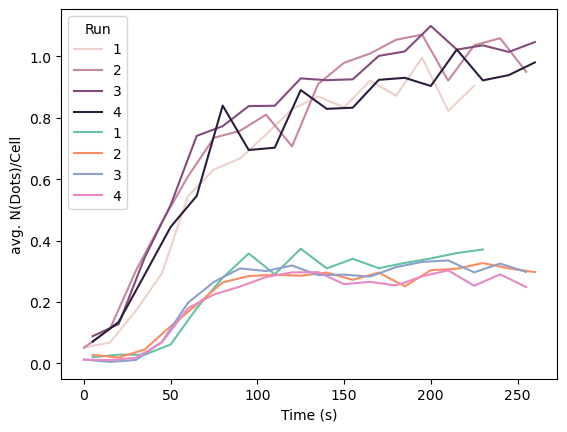

In [4]:
run1_wt = dfRuns(wt_folder + 'run1DotsPerCell.txt', OSym="odd", run=1, protein="WT", ONPG="None")
run1_wt["Time (s)"] = run1_wt["Time (s)"]-30
run1_wt["Time_r (s)"] = run1_wt["Time_r (s)"]-30
run2_wt = dfRuns(wt_folder + 'run2DotsPerCell.txt', OSym="odd", run=2, protein="WT", ONPG="None")
run3_wt = dfRuns(wt_folder + 'run3DotsPerCell.txt', OSym="even", run=3, protein="WT", ONPG="None")
run4_wt = dfRuns(wt_folder + 'run4DotsPerCell.txt', OSym="even", run=4, protein="WT", ONPG="None")
runs_wt = pd.concat([run1_wt[8:],run2_wt[4:],run3_wt[4:],run4_wt[4:]])
sns.lineplot(data=runs_wt[runs_wt["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_wt[runs_wt["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

In [5]:
runs_wt

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
8,0.051471,0.008731,59632.0,0.0,0.0,OSymL,1,WT,1 mM,None
9,0.020000,0.005496,64632.0,5.0,0.0,term,1,WT,1 mM,None
10,0.067901,0.011031,74634.0,15.0,15.0,OSymL,1,WT,1 mM,None
11,0.028257,0.008532,79632.0,20.0,15.0,term,1,WT,1 mM,None
12,0.171700,0.017096,89632.0,30.0,30.0,OSymL,1,WT,1 mM,None
...,...,...,...,...,...,...,...,...,...,...
35,0.921850,0.038013,259760.0,230.0,225.0,OSymL,4,WT,1 mM,None
36,0.289970,0.023338,269760.0,240.0,240.0,term,4,WT,1 mM,None
37,0.939000,0.039600,274760.0,245.0,240.0,OSymL,4,WT,1 mM,None
38,0.248400,0.019806,284760.0,255.0,255.0,term,4,WT,1 mM,None


<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

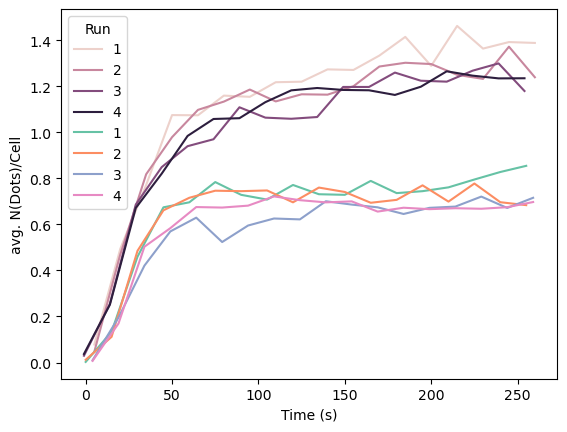

In [6]:
run1_wt_o = dfRuns(wt_folder_ONPG + 'run1DotsPerCell.txt', OSym="even", run=1, protein="WT")
run2_wt_o = dfRuns(wt_folder_ONPG + 'run2DotsPerCell.txt', OSym="even", run=2, protein="WT")
run3_wt_o = dfRuns(wt_folder_ONPG + 'run3DotsPerCell.txt', OSym="odd", run=3, protein="WT")
run4_wt_o = dfRuns(wt_folder_ONPG + 'run4DotsPerCell.txt', OSym="odd", run=4, protein="WT")
runs_wt_o = pd.concat([run1_wt_o[4:],run2_wt_o[4:],run3_wt_o[4:],run4_wt_o[4:]])#
sns.lineplot(data=runs_wt_o[runs_wt_o["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_wt_o[runs_wt_o["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

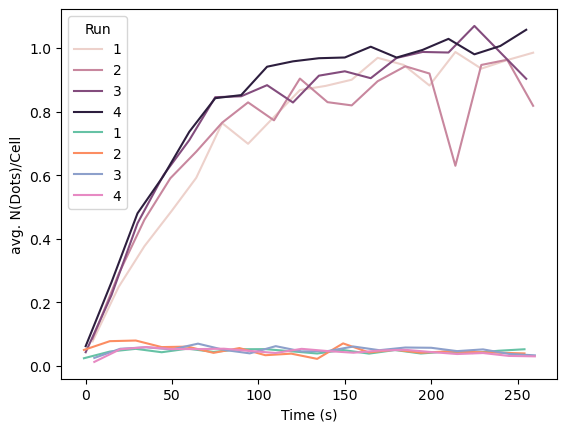

In [7]:
run1_Q_o = dfRuns(Q55N_folder_ONPG + 'run5DotsPerCell.txt', OSym="even", run=1, protein="Q55N", IPTG="0.1 mM")
run2_Q_o  = dfRuns(Q55N_folder_ONPG + 'run6DotsPerCell.txt', OSym="even", run=2, protein="Q55N", IPTG="0.1 mM")
run3_Q_o = dfRuns(Q55N_folder_ONPG + 'run7DotsPerCell.txt', OSym="odd", run=3, protein="Q55N", IPTG="0.1 mM")
run4_Q_o = dfRuns(Q55N_folder_ONPG + 'run8DotsPerCell.txt', OSym="odd", run=4, protein="Q55N", IPTG="0.1 mM")
runs_Q_o = pd.concat([run1_Q_o[4:],run2_Q_o[4:],run3_Q_o[4:],run4_Q_o[4:]])
sns.lineplot(data=runs_Q_o[runs_Q_o["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_Q_o[runs_Q_o["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

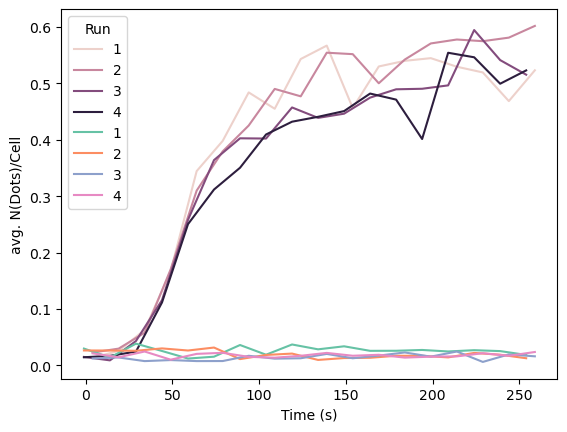

In [8]:
run1_Q = dfRuns(Q55N_folder+ 'run1DotsPerCell.txt', OSym="even", run=1, protein="Q55N", ONPG="None")
run2_Q  = dfRuns(Q55N_folder + 'run2DotsPerCell.txt', OSym="even", run=2, protein="Q55N", ONPG="None")
run3_Q = dfRuns(Q55N_folder + 'run3DotsPerCell.txt', OSym="odd", run=3, protein="Q55N", ONPG="None")
run4_Q = dfRuns(Q55N_folder + 'run4DotsPerCell.txt', OSym="odd", run=4, protein="Q55N", ONPG="None")
runs_Q = pd.concat([run1_Q[4:],run2_Q[4:],run3_Q[4:],run4_Q[4:]])
sns.lineplot(data=runs_Q[runs_Q["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_Q[runs_Q["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

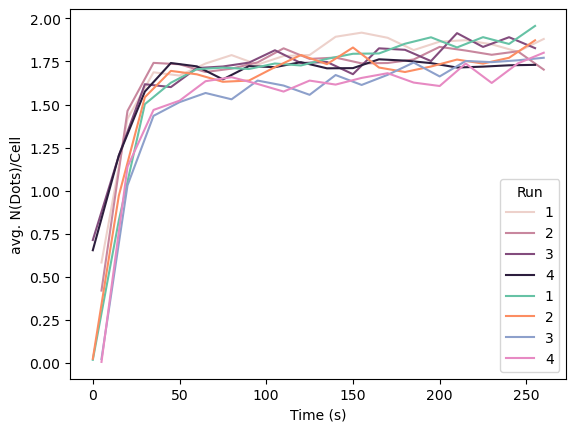

In [9]:
run1_V_o = dfRuns(V52A_folder_ONPG + 'run1DotsPerCell.txt', OSym="even", run=1, protein="V52A")
run2_V_o = dfRuns(V52A_folder_ONPG + 'run2DotsPerCell.txt', OSym="even", run=2, protein="V52A")
run3_V_o = dfRuns(V52A_folder_ONPG + 'run3DotsPerCell.txt', OSym="odd", run=3, protein="V52A")
run4_V_o = dfRuns(V52A_folder_ONPG + 'run4DotsPerCell.txt', OSym="odd", run=4, protein="V52A")
runs_V_o = pd.concat([run1_V_o[4:],run2_V_o[4:],run3_V_o[4:],run4_V_o[4:]])#
sns.lineplot(data=runs_V_o[runs_V_o["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_V_o[runs_V_o["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

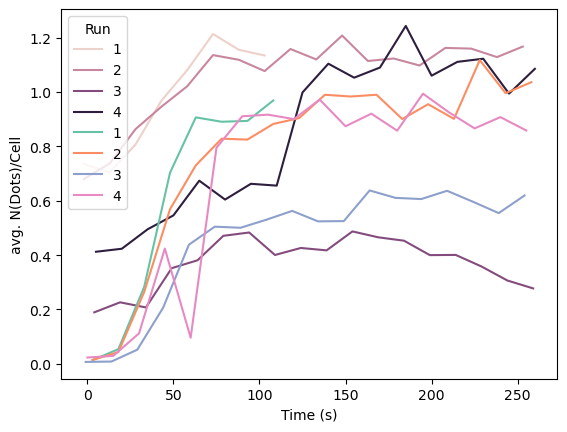

In [14]:
run1_V = dfRuns(V52A_folder + 'run1DotsPerCell.txt', OSym="odd", run=1, protein="V52A", ONPG="None")
run2_V = dfRuns(V52A_folder + 'run2DotsPerCell.txt', OSym="odd", run=2, protein="V52A", ONPG="None")
run3_V = dfRuns(V52A_folder + 'run3DotsPerCell.txt', OSym="even", run=3, protein="V52A", ONPG="None")
run4_V = dfRuns(V52A_folder + 'run4DotsPerCell.txt', OSym="even", run=4, protein="V52A", ONPG="None")
runs_V = pd.concat([run1_V[4:],run2_V[4:],run3_V[4:],run4_V[4:]])#

sns.lineplot(data=runs_V[runs_V["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_V[runs_V["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

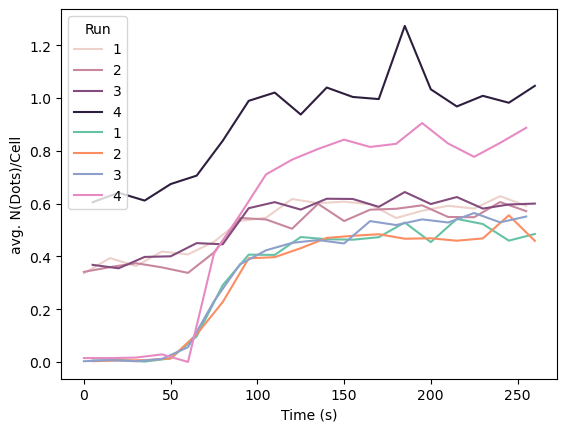

In [11]:
run1_V_10 = dfRuns(V52A_folder + 'run10_1DotsPerCell.txt', OSym="odd", run=1, protein="V52A", ONPG="None", IPTG="10 mM")
run2_V_10 = dfRuns(V52A_folder + 'run10_2DotsPerCell.txt', OSym="odd", run=2, protein="V52A", ONPG="None", IPTG="10 mM")
run3_V_10 = dfRuns(V52A_folder + 'run10_3DotsPerCell.txt', OSym="even", run=3, protein="V52A", ONPG="None", IPTG="10 mM")
run4_V_10 = dfRuns(V52A_folder + 'run10_4DotsPerCell.txt', OSym="even", run=4, protein="V52A", ONPG="None", IPTG="10 mM")
runs_V_10 = pd.concat([run1_V_10[4:],run2_V_10[4:],run3_V_10[4:],run4_V_10[4:]])#

sns.lineplot(data=runs_V_10[runs_V_10["DNA"]=="OSymL"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run")
sns.lineplot(data=runs_V_10[runs_V_10["DNA"]=="term"], x="Time (s)", y = "avg. N(Dots)/Cell", hue="Run", palette="Set2")

In [12]:
V52A_folder

'/Users/mallu899/Mirror/projects/In_Vivo_Dynamics/experiments/EXP-23-CA4324/data/'

In [13]:
runs_Q_o[runs_Q_o["Run"]==2]

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
4,0.050279,0.013990,29469.0,-1.0,0.0,term,2,Q55N,0.1 mM,10 mM
5,0.085242,0.010749,34470.0,4.0,0.0,OSymL,2,Q55N,0.1 mM,10 mM
6,0.077821,0.012538,44469.0,14.0,15.0,term,2,Q55N,0.1 mM,10 mM
7,0.288180,0.018218,49470.0,19.0,15.0,OSymL,2,Q55N,0.1 mM,10 mM
8,0.079800,0.011895,59470.0,29.0,30.0,term,2,Q55N,0.1 mM,10 mM
9,0.459690,0.023048,64469.0,34.0,30.0,OSymL,2,Q55N,0.1 mM,10 mM
10,0.059186,0.009328,74469.0,44.0,45.0,term,2,Q55N,0.1 mM,10 mM
11,0.590120,0.024889,79470.0,49.0,45.0,OSymL,2,Q55N,0.1 mM,10 mM
12,0.060644,0.008933,89469.0,59.0,60.0,term,2,Q55N,0.1 mM,10 mM
13,0.673760,0.026551,94470.0,64.0,60.0,OSymL,2,Q55N,0.1 mM,10 mM


In [66]:
runs = pd.concat([runs_wt_o,runs_Q_o, runs_V_o])

In [67]:
runs_incl_no_ONPG = pd.concat([runs_wt,runs_wt_o,runs_Q,runs_Q_o, runs_V_o, runs_V_10])

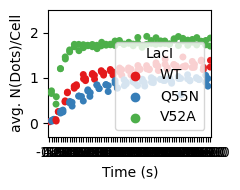

In [200]:
plt.figure(figsize=(2.5,2))
sns.stripplot(data=runs[(runs["DNA"]=="OSymL")], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="LacI", palette="Set1")
#sns.lineplot(data=runs[(runs["DNA"]=="term")], x="Time (s)", y = "avg. N(Dots)/Cell", \
#              hue="LacI", palette="Set2")
#plt.xticks(np.arange(0,270,50),(0,270,50))

#plt.xlabel('$O_{SymL}$')
plt.ylim(-0.3,2.5)
#plt.legend([],[], frameon=False)
plt.tight_layout()
#plt.savefig(figures+"OSymL_binding_curves_raw.pdf")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

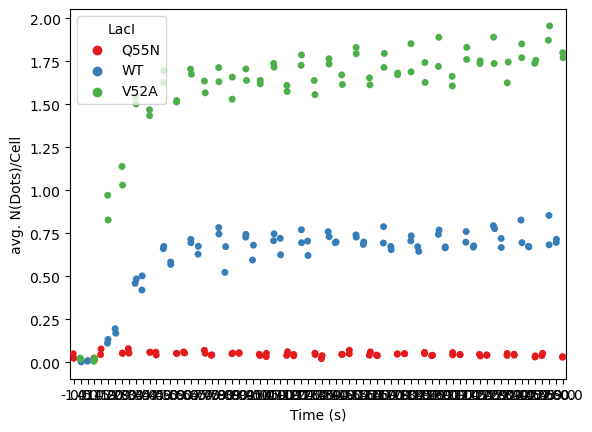

In [201]:
sns.stripplot(data=runs[(runs["DNA"]=="term")], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="LacI", palette="Set1")

Check this and make it work so that you substract points not means already

In [202]:
for i in range(4):
    print(i)

0
1
2
3


In [203]:
def calculateDeltaDots(df, LacI, IPTG="1 mM", ONPG="10 mM",runs = 4):
    # get the means ofver the runs
    rr_LacI = df[(df["IPTG"]==IPTG)&(df["LacI"]==LacI)&(df["ONPG"]==ONPG)]
    rr_LacI_OSymL = rr_LacI.copy()[rr_LacI["DNA"]=="OSymL"]
    rr_LacI_term = rr_LacI.copy()[rr_LacI["DNA"]=="term"]
    print(len(rr_LacI_OSymL)==len(rr_LacI_term))
    #return(rr_LacI_OSymL,rr_LacI_term)
    #rr = rr_LacI.groupby(["DNA", "Time (s)"]).mean()
    #return(rr)
    #reste index
    #rrT = rr.reset_index()
    
    
    # calculate the difference between the average number of dots per cell in strains with and without operator
    relNdots = np.zeros(len(rr_LacI_OSymL))
    #lRun = int(len(rr_LacI_OSymL)/4)
    RunStart = 0
    for i in range(runs):
        run_O = rr_LacI_OSymL[(rr_LacI_OSymL["Run"]==i+1)]
        run_t = rr_LacI_term[(rr_LacI_term["Run"]==i+1)]
        RunEnd = RunStart+len(run_O)
        print(len(run_O)==len(run_t))
        print(RunEnd)
        relNdots[RunStart:RunEnd] = np.array(run_O["avg. N(Dots)/Cell"])-\
        np.array(run_t["avg. N(Dots)/Cell"])
        RunStart = RunStart+len(run_O)
        #return(relNdots_n)
    #return(relNdots)
    #meanNdots = np.array(rrT[rrT["DNA"] == "OSymL"]["avg. N(Dots)/Cell"])\
    #    - np.array(rrT[rrT["DNA"] == "term"]["avg. N(Dots)/Cell"])
    # calculate the propagated sem for the difference between the average number of dots per 
    # cell in strains with and without operator  
    #semNdots = np.sqrt(np.array(rrT[rrT["DNA"] == "OSymL"]["SEM"])**2\
    #    + np.array(rrT[rrT["DNA"] == "term"]["SEM"])**2)
    #print(len(semNdots), len(rr_LacI))
    #dDots = pd.DataFrame({"$\Delta$ avg. N(dots)/cell": meanNdots, "$\delta \Delta$ avg. N(dots)/cell": semNdots,\
    #"Time (s)":np.array(rr[rr.index.get_level_values('DNA') == 'OSymL'].index.get_level_values('Time (s)')), \
    #                     "LacI":[LacI for xx in range(len(meanNdots))]})
    
    rr_LacI_OSymL["$\Delta$ avg. N(dots)/cell"] =  relNdots
    return(rr_LacI_OSymL)

In [204]:
dDots_wt = calculateDeltaDots(runs, "WT", IPTG="1 mM")

True
True
18
True
36
True
54
True
72


In [205]:
dDots_wt

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG,$\Delta$ avg. N(dots)/cell
5,0.078292,0.009409,34685.0,5.0,0.0,OSymL,1,WT,1 mM,10 mM,0.075674
7,0.493070,0.022418,49685.0,20.0,15.0,OSymL,1,WT,1 mM,10 mM,0.359660
9,0.770860,0.027025,64685.0,35.0,30.0,OSymL,1,WT,1 mM,10 mM,0.311340
11,1.074500,0.032741,79685.0,50.0,45.0,OSymL,1,WT,1 mM,10 mM,0.400590
13,1.073700,0.032917,94698.0,65.0,60.0,OSymL,1,WT,1 mM,10 mM,0.377950
...,...,...,...,...,...,...,...,...,...,...,...
30,1.197700,0.034397,224410.0,194.0,195.0,OSymL,4,WT,1 mM,10 mM,0.531750
32,1.264700,0.036586,239410.0,209.0,210.0,OSymL,4,WT,1 mM,10 mM,0.594630
34,1.245700,0.032778,254410.0,224.0,225.0,OSymL,4,WT,1 mM,10 mM,0.577980
36,1.233900,0.035331,269410.0,239.0,240.0,OSymL,4,WT,1 mM,10 mM,0.559330


In [206]:
dDots_Q = calculateDeltaDots(runs, "Q55N", IPTG="0.1 mM")

dDots = pd.concat([ dDots_wt, dDots_Q])

True
True
18
True
36
True
54
True
72


In [207]:
dDots.head()

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG,$\Delta$ avg. N(dots)/cell
5,0.078292,0.009409,34685.0,5.0,0.0,OSymL,1,WT,1 mM,10 mM,0.075674
7,0.493070,0.022418,49685.0,20.0,15.0,OSymL,1,WT,1 mM,10 mM,0.359660
9,0.770860,0.027025,64685.0,35.0,30.0,OSymL,1,WT,1 mM,10 mM,0.311340
11,1.074500,0.032741,79685.0,50.0,45.0,OSymL,1,WT,1 mM,10 mM,0.400590
13,1.073700,0.032917,94698.0,65.0,60.0,OSymL,1,WT,1 mM,10 mM,0.377950


In [208]:
Q55N_runs = runs[(runs["IPTG"]=="0.1 mM")&(runs["LacI"]=="Q55N")&(runs["ONPG"]=="10 mM")]

In [209]:
np.array(Q55N_runs[(Q55N_runs["Run"]==1)&(Q55N_runs["DNA"]=="OSymL")]["avg. N(Dots)/Cell"])

array([0.077124, 0.24773 , 0.37643 , 0.48909 , 0.5916  , 0.76361 ,
       0.69858 , 0.78288 , 0.86757 , 0.88077 , 0.90012 , 0.96899 ,
       0.94682 , 0.88191 , 0.98726 , 0.93495 , 0.96192 , 0.98506 ])

In [210]:
np.array(Q55N_runs[(Q55N_runs["Run"]==1)&(Q55N_runs["DNA"]=="OSymL")]["avg. N(Dots)/Cell"])-\
np.array(Q55N_runs[(Q55N_runs["Run"]==1)&(Q55N_runs["DNA"]=="term")]["avg. N(Dots)/Cell"])

array([0.053028, 0.202617, 0.322771, 0.446106, 0.537318, 0.719695,
       0.646211, 0.730116, 0.821565, 0.841746, 0.850181, 0.930337,
       0.896945, 0.842886, 0.942193, 0.894474, 0.914244, 0.932685])

In [211]:
len(Q55N_runs)

144

<Axes: xlabel='Time (s)', ylabel='$\\Delta$ avg. N(dots)/cell'>

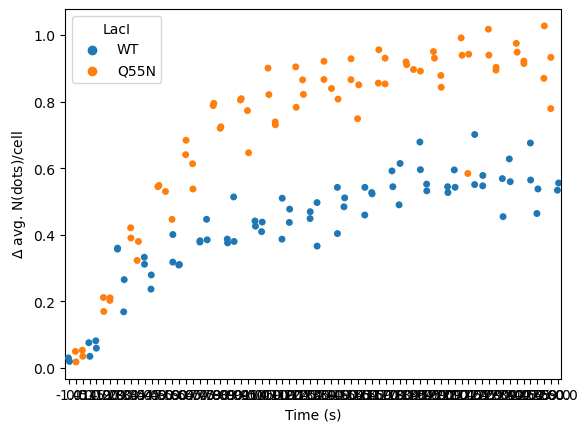

In [212]:
sns.stripplot(dDots, y="$\Delta$ avg. N(dots)/cell", x="Time (s)", hue="LacI") #

In [213]:
def func(x, a, b, k):
    return a * (1- b * np.exp(-k * x) )
def fit_curve(df, p0=(1,3,0.01), skipFirst=0, LacI="WT"):
    
    from scipy.optimize import curve_fit
    
    DDots = df[df["LacI"]==LacI]["$\Delta$ avg. N(dots)/cell"]
    #QDDots = df[df["LacI"]=="Q55N"]["$\Delta$ avg. N(dots)/cell"]
    
    Time = df[df["LacI"]==LacI]["Time (s)"]
    #QTime = df[df["LacI"]=="Q55N"]["Time (s)"]
    
    x = Time.values
    #x_Q = QTime.values
    y = DDots.values
    #y_Q = QDDots.values
    popt, pcov = curve_fit(func, x[skipFirst:], y[skipFirst:], p0=p0)
    #popt_Q, pcov_Q = curve_fit(func, x_Q[skipFirst:], y_Q[skipFirst:], p0=p0)
    
    print(popt)
    return(x, y, popt)

In [214]:
x_wt1, y_wt1, popt_wt1 = fit_curve(dDots[dDots["Run"]==1])

[0.61521248 0.78481468 0.01245106]


In [215]:
x_wt1, y_wt1, popt_wt1 = fit_curve(dDots[dDots["Run"]==2])

[0.59248143 0.77449183 0.01082081]


In [216]:
x_wt1, y_wt1, popt_wt1 = fit_curve(dDots[dDots["Run"]==3])

[0.56045823 0.98415272 0.01613646]


In [217]:
x_wt1, y_wt1, popt_wt1 = fit_curve(dDots[dDots["Run"]==4])

[0.60106839 0.9771208  0.0116553 ]


In [218]:
x_Q1, y_Q1, popt_Q1 = fit_curve(dDots[dDots["Run"]==1], LacI="Q55N", skipFirst=0)

[0.96263373 1.02487577 0.01401103]


In [219]:
x_Q1, y_Q1, popt_Q1 = fit_curve(dDots[dDots["Run"]==2], LacI="Q55N", skipFirst=0)

[0.84165228 1.09208718 0.02259036]


In [220]:
x_Q1, y_Q1, popt_Q1 = fit_curve(dDots[dDots["Run"]==3], LacI="Q55N", skipFirst=0)

[0.94114568 1.01747444 0.01944856]


In [221]:
x_Q1, y_Q1, popt_Q1 = fit_curve(dDots[dDots["Run"]==4], LacI="Q55N", skipFirst=0)

[0.99484427 0.98526084 0.01863555]


In [222]:
Q = np.mean([0.01401103,0.02259036,0.01944856,0.01863555]),np.std([0.01401103,0.02259036,0.01944856,0.01863555])

Q

(0.018671375, 0.0030693060658762913)

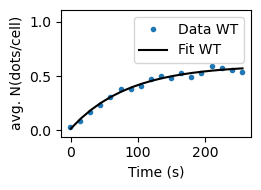

In [142]:
plt.figure(figsize=(2.8,2.))
plt.plot(x_wt1, y_wt1, 'o', label="Data WT", markersize=3)
plt.plot(np.arange(0,260,15), func(np.arange(0,260,15), *popt_wt1), 'k-', label="Fit WT")
plt.legend()
plt.ylim(-0.06,1.11)

plt.legend()
plt.ylabel("avg. N(dots/cell)")
plt.xlabel("Time (s)")
plt.tight_layout()

plt.savefig(figures+"OSymL_WT_binding_curves_fitted_ONPG.pdf")

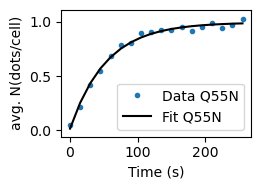

In [143]:
plt.figure(figsize=(2.8,2.))

plt.plot(x_Q1, y_Q1, 'o', label="Data Q55N", markersize=3)

plt.plot(np.arange(0,260,15), func(np.arange(0,260,15), *popt_Q1), 'k-', label="Fit Q55N")
plt.ylim(-0.06,1.11)

plt.legend()
plt.ylabel("avg. N(dots/cell)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.savefig(figures+"OSymL_Q55N_binding_curves_fitted_ONPG.pdf")

In [144]:
dDots_wt = calculateDeltaDots(runs_incl_no_ONPG, "WT", IPTG="1 mM", ONPG="None")


True
True
16
True
34
True
52
True
70


In [145]:
dDots_Q = calculateDeltaDots(runs_incl_no_ONPG, "Q55N", IPTG="1 mM", ONPG="None")

dDots = pd.concat([ dDots_wt, dDots_Q])

True
True
18
True
36
True
54
True
72


<Axes: xlabel='Time (s)', ylabel='$\\Delta$ avg. N(dots)/cell'>

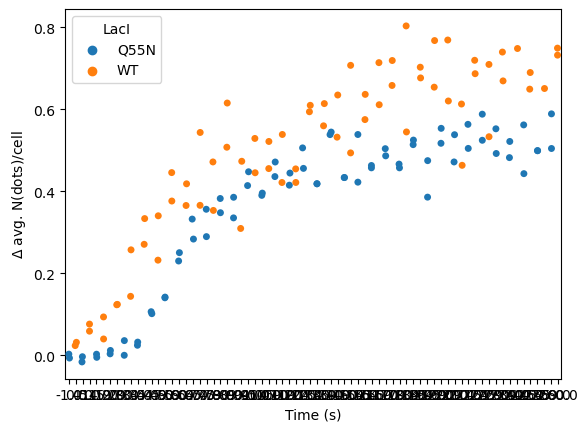

In [146]:
sns.stripplot(dDots, y="$\Delta$ avg. N(dots)/cell", x="Time (s)", hue="LacI") #

In [152]:
x_wt1, y_wt1, popt_wt1  = fit_curve(dDots[dDots["Run"]==1])
x_Q1, y_Q1, popt_Q1  = fit_curve(dDots[dDots["Run"]==1], LacI="Q55N", skipFirst=0)

[0.62730922 1.02621972 0.01154902]
[0.53105709 1.26889446 0.01642146]


In [151]:
x_wt1, y_wt1, popt_wt1  = fit_curve(dDots[dDots["Run"]==2])
x_Q1, y_Q1, popt_Q1  = fit_curve(dDots[dDots["Run"]==2], LacI="Q55N", skipFirst=0)

[0.77387731 0.98576925 0.01155886]
[0.62617293 1.1906612  0.01176156]


In [150]:
x_wt1, y_wt1, popt_wt1  = fit_curve(dDots[dDots["Run"]==3])
x_Q1, y_Q1, popt_Q1  = fit_curve(dDots[dDots["Run"]==3], LacI="Q55N", skipFirst=0)

[0.74274448 0.9884643  0.01491876]
[0.56655632 1.11206485 0.01126133]


In [149]:
x_wt1, y_wt1, popt_wt1  = fit_curve(dDots[dDots["Run"]==4])
x_Q1, y_Q1, popt_Q1  = fit_curve(dDots[dDots["Run"]==4], LacI="Q55N", skipFirst=0)

[0.72121267 0.9768154  0.0119604 ]
[0.55997028 1.12748496 0.01051138]


In [159]:
wt = np.mean([0.01154902,0.01155886,0.01491876,0.0119604]),np.std([0.01154902,0.01155886,0.01491876,0.0119604])

wt

(0.012496759999999999, 0.0014081578007453565)

In [160]:
Q = np.mean([0.01642146,0.01176156,0.01126133,0.01051138]),np.std([0.01642146,0.01176156,0.01126133,0.01051138])

Q

(0.012488932500000001, 0.0023136316193527323)

In [148]:
x_wt1

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225.,   0.,  15.,  30.,  45.,  60.,  75.,
        90., 105., 120., 135., 150., 165., 180., 195., 210., 225., 240.,
       255.,   5.,  20.,  35.,  50.,  65.,  80.,  95., 110., 125., 140.,
       155., 170., 185., 200., 215., 230., 245., 260.,   5.,  20.,  35.,
        50.,  65.,  80.,  95., 110., 125., 140., 155., 170., 185., 200.,
       215., 230., 245., 260.])

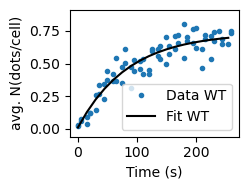

In [90]:
plt.figure(figsize=(2.5,2.))

plt.plot(x_wt1, y_wt1, 'o', label="Data WT", markersize=3)
plt.plot(np.arange(0,260,15), func(np.arange(0,260,15), *popt_wt1), 'k-', label="Fit WT")
plt.ylim(-0.06,0.91)
plt.legend()
plt.ylabel("avg. N(dots/cell)")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.savefig(figures+"OSymL_binding_curves_fitted.pdf")

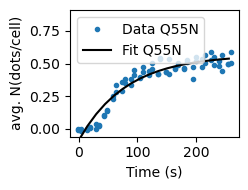

In [91]:
plt.figure(figsize=(2.5,2.))

plt.plot(x_Q1, y_Q1, 'o', label="Data Q55N", markersize=3)

plt.plot(np.arange(0,260,15), func(np.arange(0,260,15), *popt_Q1), 'k-', label="Fit Q55N")
plt.ylim(-0.06,0.91)

plt.legend()
plt.ylabel("avg. N(dots/cell)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.savefig(figures+"OSymL_Q55N_binding_curves_fitted.pdf")

In [92]:
runs_incl_no_ONPG

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
8,0.051471,0.008731,59632.0,0.0,0.0,OSymL,1,WT,1 mM,None
9,0.020000,0.005496,64632.0,5.0,0.0,term,1,WT,1 mM,None
10,0.067901,0.011031,74634.0,15.0,15.0,OSymL,1,WT,1 mM,None
11,0.028257,0.008532,79632.0,20.0,15.0,term,1,WT,1 mM,None
12,0.171700,0.017096,89632.0,30.0,30.0,OSymL,1,WT,1 mM,None
...,...,...,...,...,...,...,...,...,...,...
35,1.008400,0.040791,259840.0,230.0,225.0,OSymL,4,V52A,10 mM,None
36,0.830110,0.035726,269840.0,240.0,240.0,term,4,V52A,10 mM,None
37,0.982120,0.038065,274870.0,245.0,240.0,OSymL,4,V52A,10 mM,None
38,0.887340,0.038315,284840.0,255.0,255.0,term,4,V52A,10 mM,None


<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

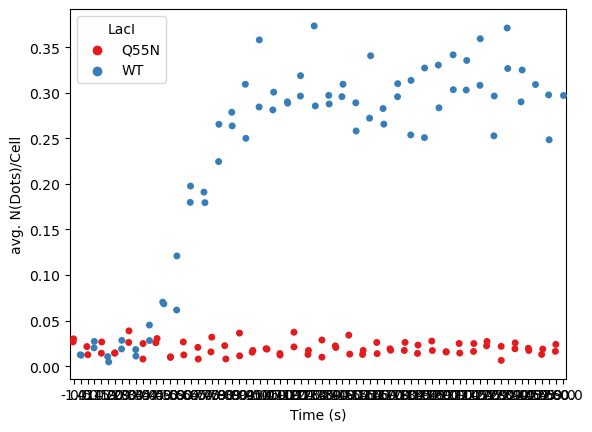

In [93]:
sns.stripplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["ONPG"]=="None")&(runs_incl_no_ONPG["DNA"]=="term")\
                &(runs_incl_no_ONPG["IPTG"]=="1 mM")], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="LacI", palette="Set1")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

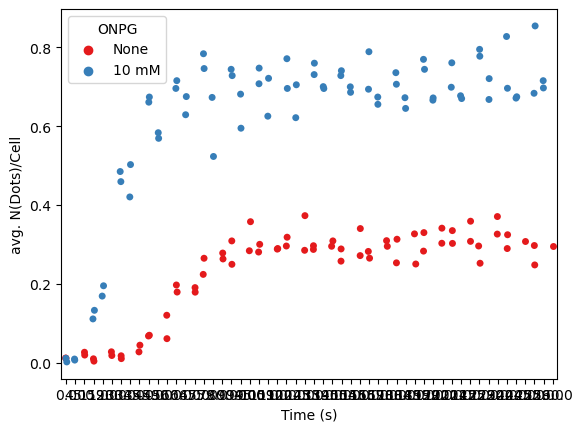

In [94]:
sns.stripplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="WT")&(runs_incl_no_ONPG["DNA"]=="term")\
                &(runs_incl_no_ONPG["IPTG"]=="1 mM")], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette="Set1")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

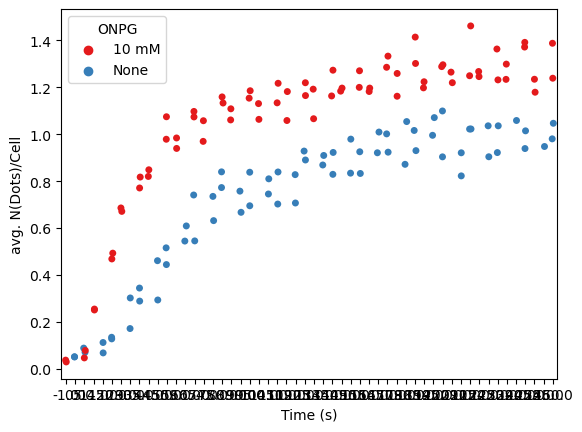

In [95]:
sns.stripplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="WT")&(runs_incl_no_ONPG["DNA"]=="OSymL")\
                &(runs_incl_no_ONPG["IPTG"]=="1 mM")], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette="Set1")

<Axes: xlabel='Time (s)', ylabel='avg. N(Dots)/Cell'>

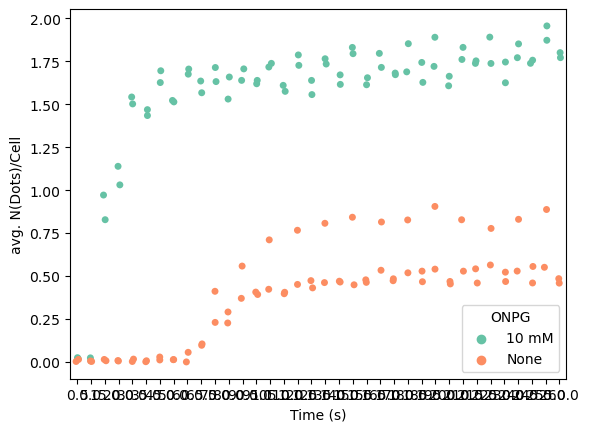

In [96]:
sns.stripplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="V52A")&(runs_incl_no_ONPG["DNA"]=="term")\
                ], x="Time (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette="Set2")


In [97]:
runs_incl_no_ONPG["avg. N(Dots)/Cell"].rolling(window=10)

Rolling [window=10,center=False,axis=0,method=single]

In [98]:
runs_incl_no_ONPG

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
8,0.051471,0.008731,59632.0,0.0,0.0,OSymL,1,WT,1 mM,None
9,0.020000,0.005496,64632.0,5.0,0.0,term,1,WT,1 mM,None
10,0.067901,0.011031,74634.0,15.0,15.0,OSymL,1,WT,1 mM,None
11,0.028257,0.008532,79632.0,20.0,15.0,term,1,WT,1 mM,None
12,0.171700,0.017096,89632.0,30.0,30.0,OSymL,1,WT,1 mM,None
...,...,...,...,...,...,...,...,...,...,...
35,1.008400,0.040791,259840.0,230.0,225.0,OSymL,4,V52A,10 mM,None
36,0.830110,0.035726,269840.0,240.0,240.0,term,4,V52A,10 mM,None
37,0.982120,0.038065,274870.0,245.0,240.0,OSymL,4,V52A,10 mM,None
38,0.887340,0.038315,284840.0,255.0,255.0,term,4,V52A,10 mM,None


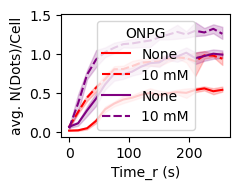

In [99]:
plt.figure(figsize=(2.5,2.))

sns.lineplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="Q55N")&(runs_incl_no_ONPG["DNA"]=="OSymL")\
                ], x="Time_r (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette=["red","red"], style="ONPG")
sns.lineplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="WT")&(runs_incl_no_ONPG["DNA"]=="OSymL")\
                ], x="Time_r (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette=["purple","purple"], style="ONPG")
plt.ylim(-0.06,1.52)
plt.tight_layout()
plt.savefig(figures+"OSymL_WT_Q55N_binding_ONPG.pdf")

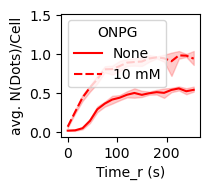

In [103]:
plt.figure(figsize=(2.2,2.))

sns.lineplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="Q55N")&(runs_incl_no_ONPG["DNA"]=="OSymL")\
                ], x="Time_r (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette=["red","red"], style="ONPG")

plt.ylim(-0.06,1.52)
plt.tight_layout()
plt.savefig(figures+"OSymL_Q55N_binding_ONPG.pdf")

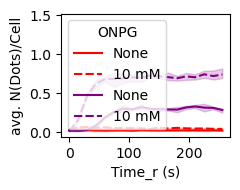

In [100]:
plt.figure(figsize=(2.5,2.))

sns.lineplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="Q55N")&(runs_incl_no_ONPG["DNA"]=="term")\
                ], x="Time_r (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette=["red","red"], style="ONPG")
sns.lineplot(data=runs_incl_no_ONPG[(runs_incl_no_ONPG["LacI"]=="WT")&(runs_incl_no_ONPG["DNA"]=="term")\
                ], x="Time_r (s)", y = "avg. N(Dots)/Cell", \
              hue="ONPG", palette=["purple","purple"], style="ONPG")
plt.ylim(-0.06,1.52)
plt.tight_layout()
plt.savefig(figures+"Term_WT_Q55N_binding_ONPG.pdf")


In [165]:
runs_incl_no_ONPG

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
8,0.051471,0.008731,59632.0,0.0,0.0,OSymL,1,WT,1 mM,None
9,0.020000,0.005496,64632.0,5.0,0.0,term,1,WT,1 mM,None
10,0.067901,0.011031,74634.0,15.0,15.0,OSymL,1,WT,1 mM,None
11,0.028257,0.008532,79632.0,20.0,15.0,term,1,WT,1 mM,None
12,0.171700,0.017096,89632.0,30.0,30.0,OSymL,1,WT,1 mM,None
...,...,...,...,...,...,...,...,...,...,...
35,1.008400,0.040791,259840.0,230.0,225.0,OSymL,4,V52A,10 mM,None
36,0.830110,0.035726,269840.0,240.0,240.0,term,4,V52A,10 mM,None
37,0.982120,0.038065,274870.0,245.0,240.0,OSymL,4,V52A,10 mM,None
38,0.887340,0.038315,284840.0,255.0,255.0,term,4,V52A,10 mM,None


In [167]:
runs_start_end=runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==0)&(runs_incl_no_ONPG["ONPG"]=="None")]\
.append(runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==255)&(runs_incl_no_ONPG["ONPG"]=="None")])

/var/folders/2b/mq1shfbd41df_2f889hnlkv80000gp/T/ipykernel_32822/2854918374.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==255)&(runs_incl_no_ONPG["ONPG"]=="None")])


<Axes: xlabel='LacI', ylabel='avg. N(Dots)/Cell'>

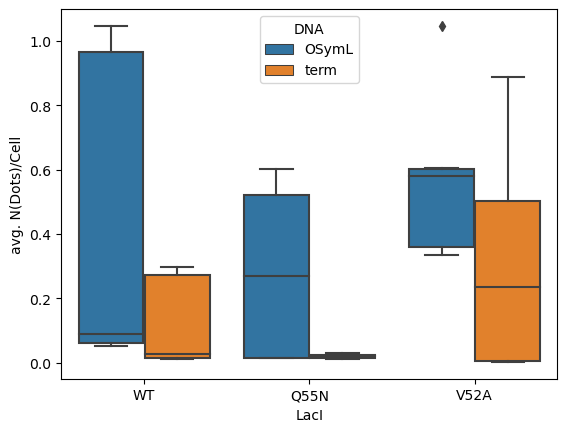

In [168]:
sns.boxplot(runs_start_end, hue="DNA", x="LacI", y="avg. N(Dots)/Cell")

In [169]:
runs_start_end=runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==0)&(runs_incl_no_ONPG["ONPG"]=="10 mM")]\
.append(runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==255)&(runs_incl_no_ONPG["ONPG"]=="10 mM")])

/var/folders/2b/mq1shfbd41df_2f889hnlkv80000gp/T/ipykernel_32822/152282377.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(runs_incl_no_ONPG[(runs_incl_no_ONPG["Time_r (s)"]==255)&(runs_incl_no_ONPG["ONPG"]=="10 mM")])


In [175]:
runs_start_end

,avg. N(Dots)/Cell,SEM,Time (ms),Time (s),Time_r (s),DNA,Run,LacI,IPTG,ONPG
4,0.002618,0.001850,29685.0,0.0,0.0,term,1,WT,1 mM,10 mM
5,0.078292,0.009409,34685.0,5.0,0.0,OSymL,1,WT,1 mM,10 mM
4,0.011834,0.003722,29590.0,0.0,0.0,term,2,WT,1 mM,10 mM
5,0.046579,0.008046,34590.0,5.0,0.0,OSymL,2,WT,1 mM,10 mM
4,0.029448,0.005926,29329.0,-1.0,0.0,OSymL,3,WT,1 mM,10 mM
5,0.009926,0.003494,34329.0,4.0,0.0,term,3,WT,1 mM,10 mM
4,0.037126,0.006547,29412.0,-1.0,0.0,OSymL,4,WT,1 mM,10 mM
5,0.007255,0.004184,34412.0,4.0,0.0,term,4,WT,1 mM,10 mM
4,0.024096,0.005926,29337.0,-1.0,0.0,term,1,Q55N,0.1 mM,10 mM
5,0.077124,0.010337,34338.0,4.0,0.0,OSymL,1,Q55N,0.1 mM,10 mM


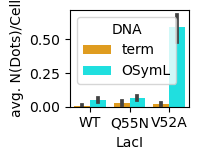

In [194]:
plt.figure(figsize=(2,1.7))
sns.barplot(runs_start_end[runs_start_end["Time_r (s)"]==0], hue="DNA", x="LacI", y="avg. N(Dots)/Cell", palette=["orange","cyan"])
plt.tight_layout()
plt.savefig(figures+"NumberofDots_Start.pdf")

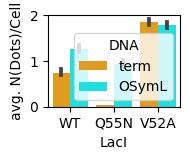

In [195]:
plt.figure(figsize=(2,1.7))
sns.barplot(runs_start_end[runs_start_end["Time_r (s)"]==255], hue="DNA", x="LacI", y="avg. N(Dots)/Cell", palette=["orange","cyan"])
plt.tight_layout()
plt.savefig(figures+"NumberofDots_End.pdf")